# Part 1 - Supervised Learning

In [2]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE

# Model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option("display.max_columns",None)

In [3]:
bank_df=pd.read_csv(r"C:\Users\saurabh\Downloads\ML Question Paper\ML Question Paper\Datasets\bank.csv",delimiter=';')

bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Display the basic info and summary of the dataset
print(bank_df.info())
print(bank_df.describe())
print(bank_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

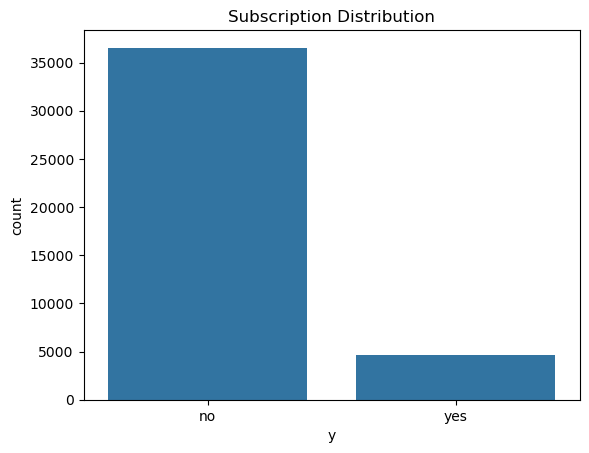

In [5]:
# Plot distribution of the target variable
sns.countplot(x='y', data=bank_df)
plt.title("Subscription Distribution")
plt.show()

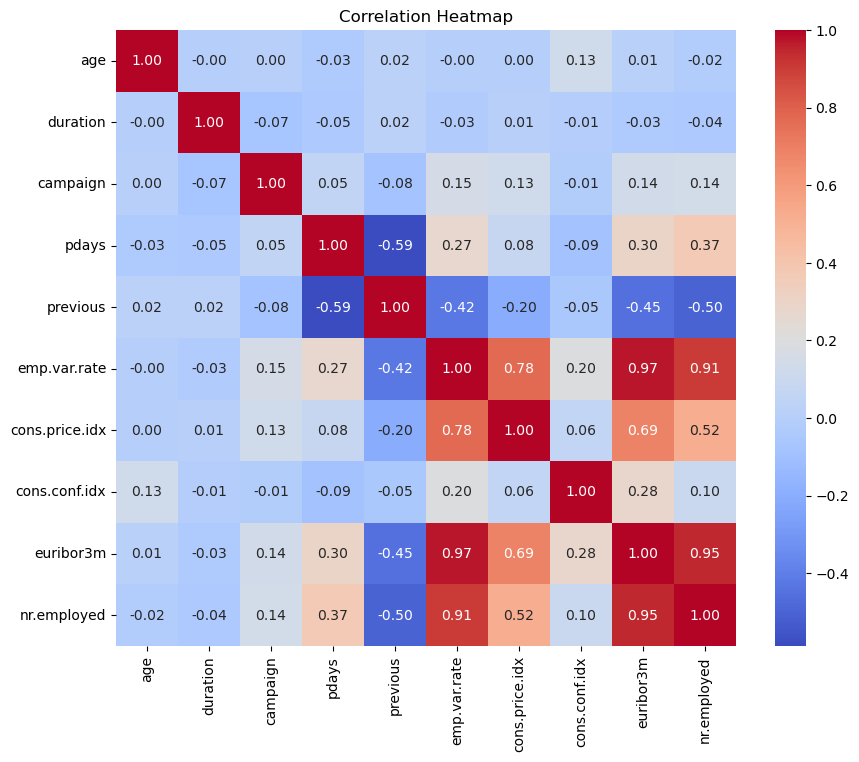

In [6]:
numerical_features = bank_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(bank_df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
bank_df.value_counts().sum()

41188

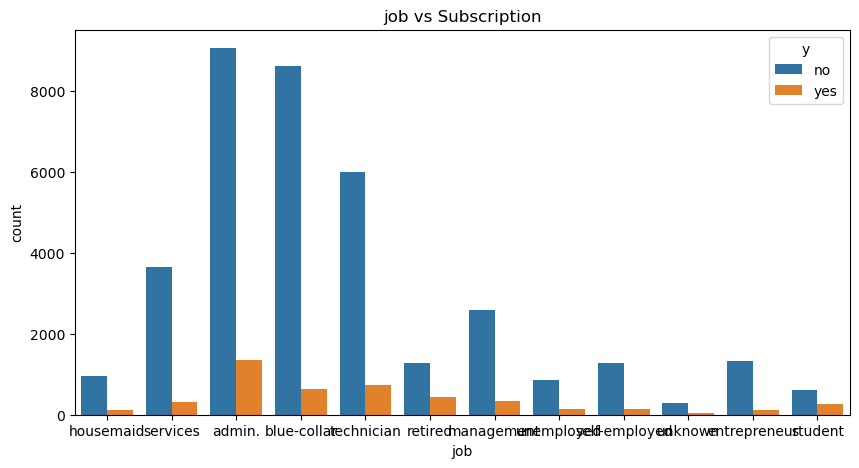

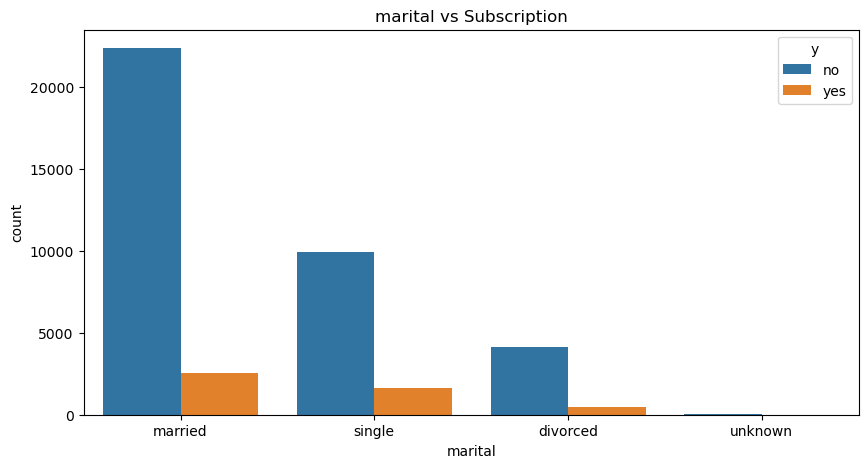

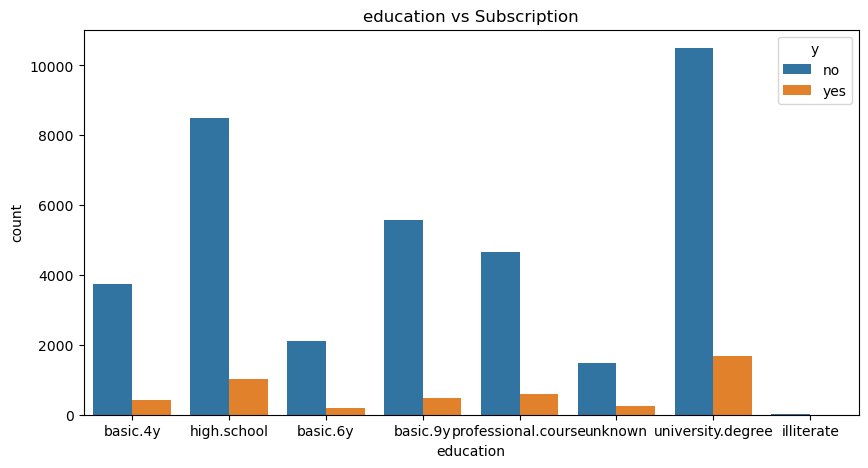

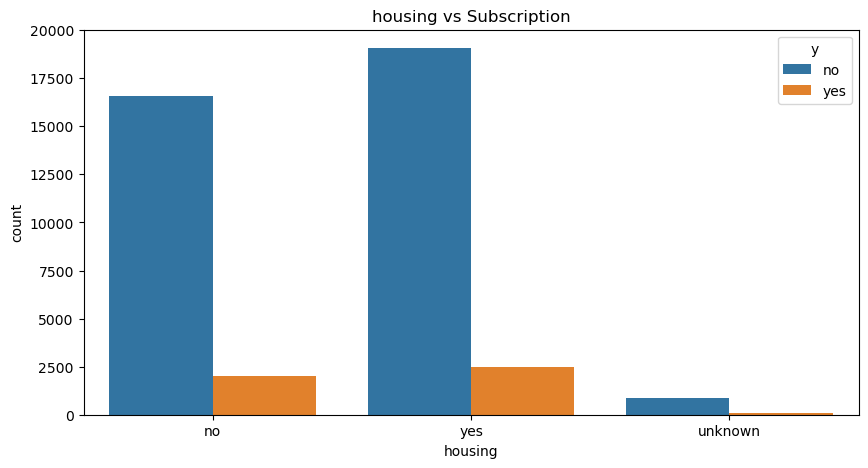

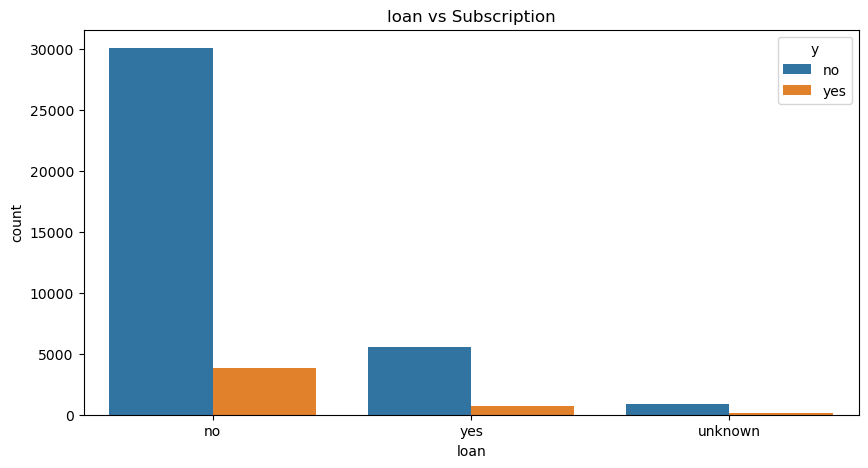

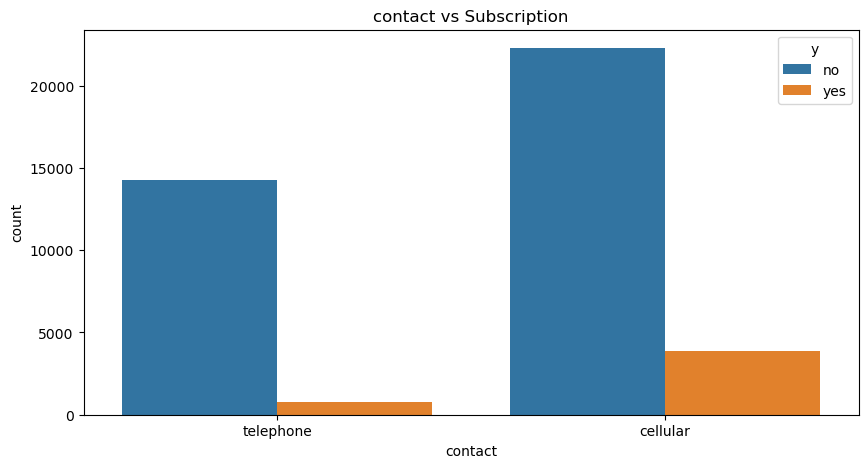

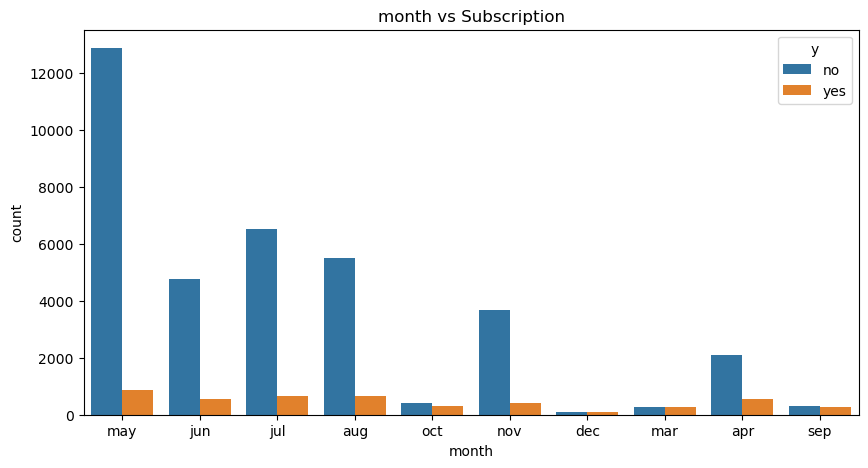

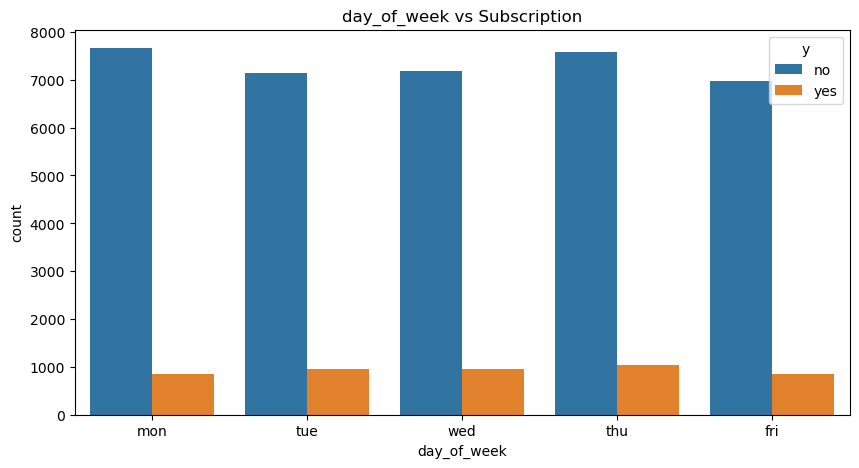

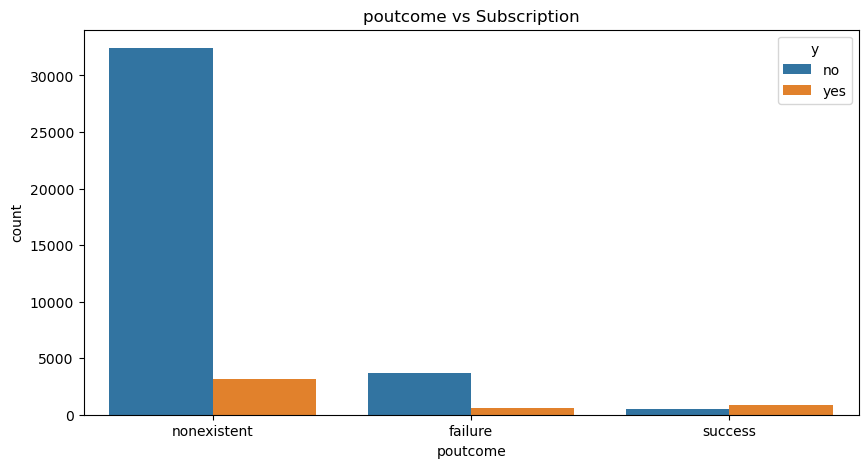

In [8]:
# Analyze categorical features
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='y', data=bank_df)
    plt.title(f"{col} vs Subscription")
    plt.show()

In [9]:
categorical_columns = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

In [10]:
# Check for missing values
print("Missing values:\n", bank_df.isnull().sum())

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [11]:
bank_df.duplicated().sum()

12

In [12]:
bank_df.drop_duplicates(inplace=True)

In [13]:
bank_df.shape

(41176, 21)

In [14]:
# Get all columns that contain 'unknown' values
columns_with_unknown = bank_df.columns[bank_df.isin(['unknown']).any()].tolist()

# Display the columns
print("Columns with 'unknown' values:", columns_with_unknown)

Columns with 'unknown' values: ['job', 'marital', 'education', 'default', 'housing', 'loan']


In [15]:
bank_df[['job', 'marital', 'education', 'housing', 'loan']] = bank_df[['job', 'marital', 'education', 'housing', 'loan']].replace('unknown', np.nan)

In [16]:
bank_df[['default']] = bank_df[['default']].replace('unknown', np.nan)

In [17]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
bank_df['job'].fillna(bank_df['job'].mode()[0], inplace=True)
bank_df['marital'].fillna(bank_df['marital'].mode()[0], inplace=True)
bank_df['education'].fillna(bank_df['education'].mode()[0], inplace=True)
bank_df['housing'].fillna(bank_df['housing'].mode()[0], inplace=True)
bank_df['loan'].fillna(bank_df['loan'].mode()[0], inplace=True)
bank_df['default'].fillna(bank_df['default'].mode()[0], inplace=True)

C:\Users\saurabh\AppData\Local\Temp\ipykernel_21164\3281863348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df['job'].fillna(bank_df['job'].mode()[0], inplace=True)
C:\Users\saurabh\AppData\Local\Temp\ipykernel_21164\3281863348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [19]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
bank_df[categorical_columns] = bank_df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Display the transformed DataFrame
print("Transformed DataFrame:")
print(bank_df.head())

Transformed DataFrame:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.emp

In [21]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,0,0,0,1,6,1,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,6,0,0,0,1,6,1,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,1,0,1,6,1,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,1,0,1,6,1,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
bank_df.shape

(41176, 21)

In [23]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
bank_df = bank_df.drop(columns=['duration'])
print("Duration column dropped.")

Duration column dropped.


In [25]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
# Split data into features (X) and target (y)
X = bank_df.drop('y', axis=1)
y = bank_df['y']

In [27]:
X.shape
y.shape

(41176,)

In [28]:
# Fit a Random Forest model for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance visualization
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)
print("Top 10 Features:\n", top_features)

# Select the top 10 features
X = bank_df[top_features.index]

Top 10 Features:
 age            0.201489
euribor3m      0.143424
campaign       0.091981
job            0.088406
education      0.070909
day_of_week    0.059150
nr.employed    0.055759
pdays          0.040947
marital        0.039999
housing        0.036227
dtype: float64


In [29]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
 y
0    36537
1    36537
Name: count, dtype: int64


In [30]:
# Standardize the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Verify scaling
print("Standardized Data Sample:\n", X_resampled[:5])

Standardized Data Sample:
 [[ 1.31552338  1.00251701 -0.51292128 -0.18881675 -1.82976158 -0.6744277
   0.63943104  0.35632929 -0.20623478 -0.92738985]
 [ 1.3989904   1.00251701 -0.51292128  0.93781644 -0.37454731 -0.6744277
   0.63943104  0.35632929 -0.20623478 -0.92738985]
 [-0.27035004  1.00251701 -0.51292128  0.93781644 -0.37454731 -0.6744277
   0.63943104  0.35632929 -0.20623478  1.07829518]
 [-0.01994898  1.00251701 -0.51292128 -1.03379164 -1.34469016 -0.6744277
   0.63943104  0.35632929 -0.20623478 -0.92738985]
 [ 1.31552338  1.00251701 -0.51292128  0.93781644 -0.37454731 -0.6744277
   0.63943104  0.35632929 -0.20623478 -0.92738985]]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

In [32]:
print("Logistic Regression:")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("-" * 50)

Logistic Regression:
Accuracy: 0.7283612726650701
Confusion Matrix:
 [[5715 1633]
 [2337 4930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      7348
           1       0.75      0.68      0.71      7267

    accuracy                           0.73     14615
   macro avg       0.73      0.73      0.73     14615
weighted avg       0.73      0.73      0.73     14615

--------------------------------------------------


In [33]:
# Decision Tree Classifier
print("Decision Tree Classifier:")
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("-" * 50)

Decision Tree Classifier:
Accuracy: 0.8021211084502223
Confusion Matrix:
 [[6209 1139]
 [1753 5514]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      7348
           1       0.83      0.76      0.79      7267

    accuracy                           0.80     14615
   macro avg       0.80      0.80      0.80     14615
weighted avg       0.80      0.80      0.80     14615

--------------------------------------------------


In [34]:
# Random Forest Classifier
print("Random Forest Classifier:")
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=15, min_samples_split=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("-" * 50)

Random Forest Classifier:
Accuracy: 0.8602805336982552
Confusion Matrix:
 [[6532  816]
 [1226 6041]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      7348
           1       0.88      0.83      0.86      7267

    accuracy                           0.86     14615
   macro avg       0.86      0.86      0.86     14615
weighted avg       0.86      0.86      0.86     14615

--------------------------------------------------


In [35]:
# Decision Tree: Hyperparameter Tuning with GridSearchCV
dt_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)

# Best parameters for Decision Tree
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
best_dt = dt_grid_search.best_estimator_

# Decision Tree Evaluation
y_pred_dt = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("-" * 50)


Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Decision Tree Accuracy: 0.8462538487854944
Confusion Matrix for Decision Tree:
 [[6314 1034]
 [1213 6054]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      7348
           1       0.85      0.83      0.84      7267

    accuracy                           0.85     14615
   macro avg       0.85      0.85      0.85     14615
weighted avg       0.85      0.85      0.85     14615

--------------------------------------------------


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],  # Fewer estimators for faster computation
    'max_depth': [10, 20, 30, None],  # None allows trees to grow fully
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']  # Reduces computation by limiting features
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=20,  # Number of random combinations to try (reduce this if needed)
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)



In [37]:
# Fit the model on training data
rf_random_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf = rf_random_search.best_estimator_
print("Best Parameters for Random Forest:", rf_random_search.best_params_)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Best Parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Tuned Random Forest Accuracy: 0.9126924392747178
Confusion Matrix for Random Forest:
 [[6629  719]
 [ 557 6710]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7348
           1       0.90      0.92      0.91      7267

    accuracy                           0.91     14615
   macro avg       0.91      0.91      0.91     14615
weighted avg       0.91      0.91      0.91     14615



# Conclusion

# # Logistic Regression gave an accuracy of 72%, which wasn’t very satisfactory. Basic Decision Tree and Random Forest models performed better, with accuracies of 79% and 87%, respectively. After tuning the hyperparameters using RandomizedSearchCV, the Random Forest model stood out as the best, achieving an impressive accuracy of 91%